
170498071/170498071 [==============================] - 5s 0us/step
Shape of training images: (50000, 32, 32, 3)
Shape of training labels: (50000, 1)
Shape of testing images: (10000, 32, 32, 3)
Shape of testing labels: (10000, 1)


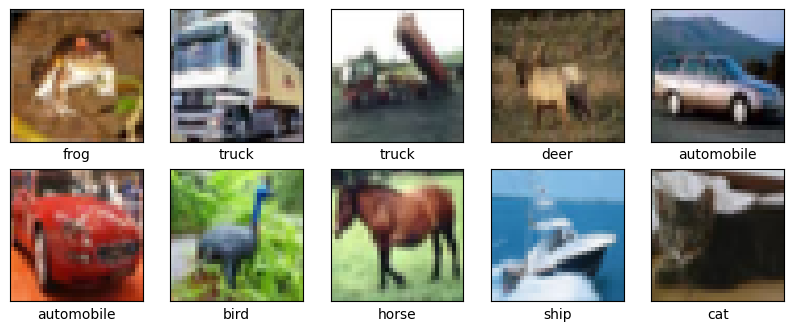



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)       

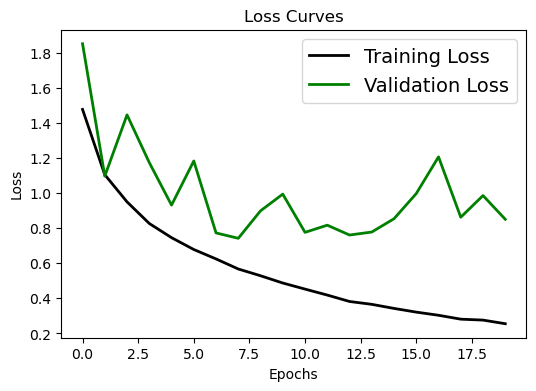

313/313 [==============================] - 4s 14ms/step - loss: 0.8509 - accuracy: 0.7716
Test Accuracy: 0.7716000080108643
313/313 [==============================] - 4s 14ms/step
[3 8 8 ... 5 4 7]


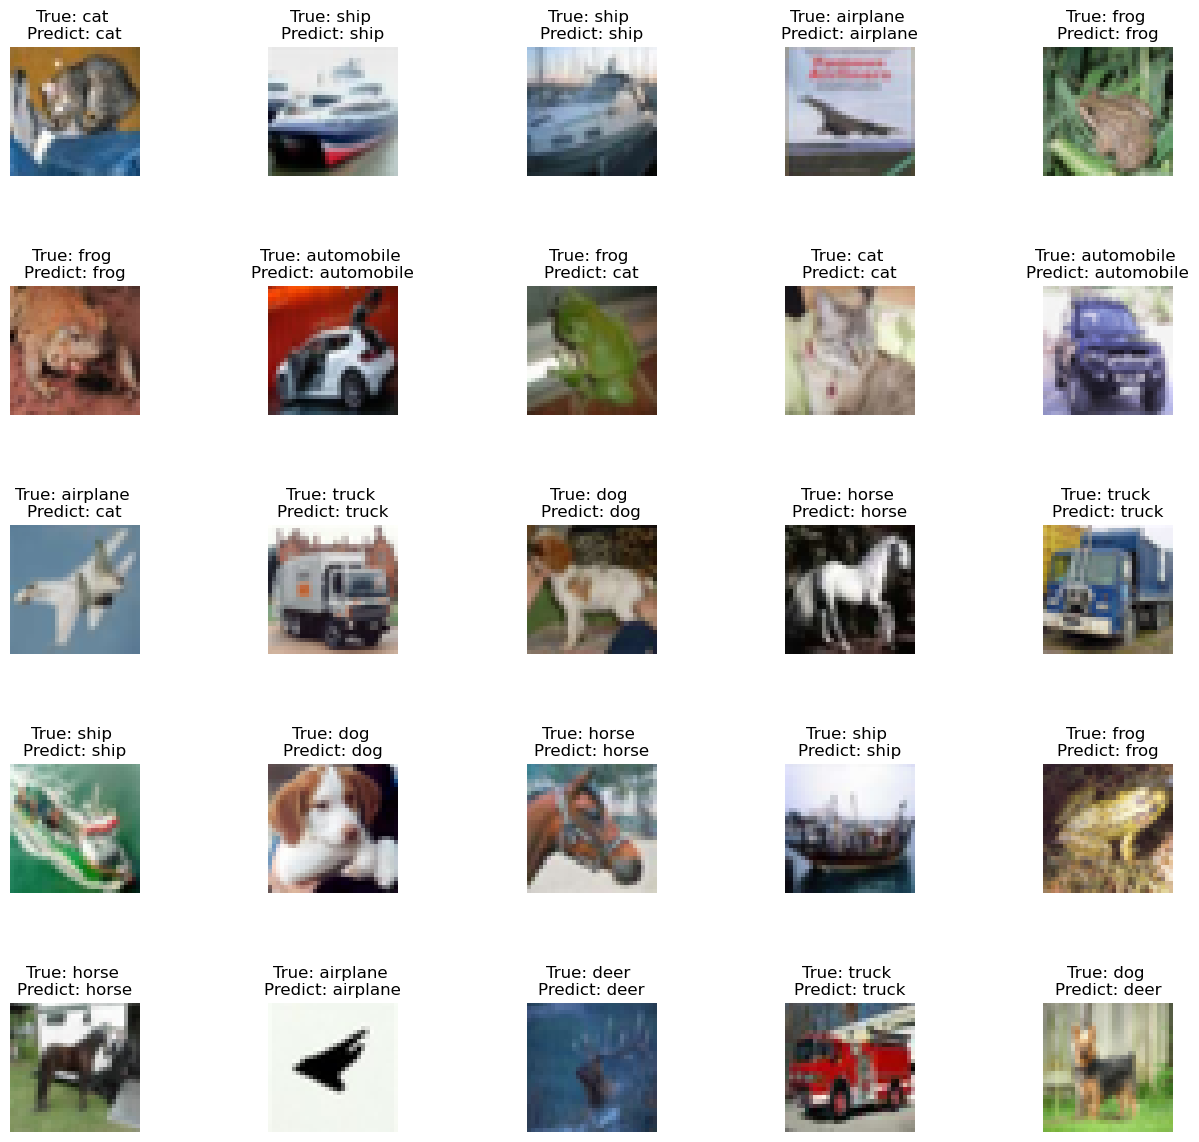

In [1]:
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Show the shape of (train_images, train_labels), (test_images, test_labels)
print("Shape of training images:", train_images.shape)
print("Shape of training labels:", train_labels.shape)
print("Shape of testing images:", test_images.shape)
print("Shape of testing labels:", test_labels.shape)

# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range(10):    # for first 10 images
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize input
train_images = train_images / 255
test_images = test_images / 255

# Change target class to one hot encoding
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Creating a sequential model and adding layers to it
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Checking the model summary
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=20,
                    validation_data=(test_images, test_labels))

# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
plt.show()

# Accuracy of test_images
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

# Making the Predictions
pred = model.predict(test_images)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

# Plotting the Actual vs. Predicted results
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)
plt.show()


In [ ]:
extra


In [4]:
!pip install tensorflow-datasets

  Obtaining dependency information for tensorflow-datasets from https://files.pythonhosted.org/packages/fe/18/4865973f5469cfe33bbe1cfc2f1918335eb44f4cc3d316c1bce22c1af2bc/tensorflow_datasets-4.9.4-py3-none-any.whl.metadata
  Obtaining dependency information for etils[enp,epath,etree]>=0.9.0 from https://files.pythonhosted.org/packages/d0/3c/784b5f94bcad62a4167f2347fe1095b627433c22a54aecc4504237494b81/etils-1.8.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for tensorflow-metadata from https://files.pythonhosted.org/packages/41/23/3705c7139886c079ef4c0e3be56a5a1fb90e9ee413a4b7caaee0ee0ea6fe/tensorflow_metadata-1.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for importlib_resources from https://files.pythonhosted.org/packages/75/06/4df55e1b7b112d183f65db9503bff189e97179b256e1ea450a3c365241e0/importlib_resources-6.4.0-py3-none-any.whl.metadata
  Obtaini

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Pavan\\anaconda3\\Lib\\site-packages\\google\\~upb\\_message.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
11

Shape of train images: (50000, 32, 32, 3)
Shape of train labels: (50000, 1)
Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


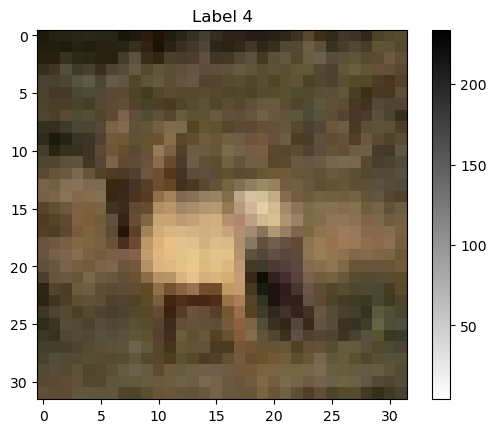

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [7]:
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print("Shape of train images:", train_images.shape)
print("Shape of train labels:", train_labels.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)

X_train = train_images
X_test = test_images
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

print(X_train.shape)
print(X_test.shape)

# display i-th image
idx = 3
image = X_train[idx]
label = Y_train[idx]
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Label {}'.format(np.argmax(label)))
plt.colorbar()
plt.grid(False)
plt.show()

# Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
base_model.trainable = False  # Not trainable weights

base_model.summary()

flatten_layer = Flatten()
dense_layer_1 = Dense(50, activation='relu')
dense_layer_2 = Dense(20, activation='relu')
prediction_layer = Dense(10, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

# Making the Predictions

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

model.fit(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

# Making the Predictions

accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test data:", accuracy[1])


In [ ]:
DENSE LAYER

Shape of train images: (50000, 32, 32, 3)
Shape of train labels: (50000, 1)
Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


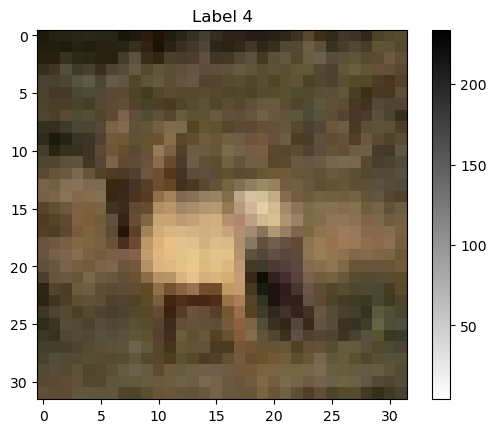

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [8]:
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print("Shape of train images:", train_images.shape)
print("Shape of train labels:", train_labels.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)

X_train = train_images
X_test = test_images
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

print(X_train.shape)
print(X_test.shape)

# display i-th image
idx = 3
image = X_train[idx]
label = Y_train[idx]
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Label {}'.format(np.argmax(label)))
plt.colorbar()
plt.grid(False)
plt.show()

# Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
base_model.trainable = False  # Not trainable weights

base_model.summary()

flatten_layer = Flatten()
dense_layer_1 = Dense(50, activation='relu')
dense_layer_2 = Dense(20, activation='relu')
dense_layer_3 = Dense(10, activation='relu')  # Additional dense layer
prediction_layer = Dense(10, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,  # Add the additional dense layer here
    prediction_layer
])

# Making the Predictions

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

model.fit(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

# Making the Predictions

accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test data:", accuracy[1])


In [ ]:
BATCHNORMALIZATION

Shape of train images: (50000, 32, 32, 3)
Shape of train labels: (50000, 1)
Shape of test images: (10000, 32, 32, 3)
Shape of test labels: (10000, 1)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


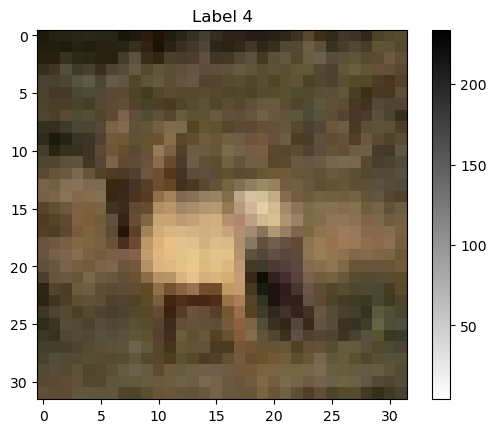

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [9]:
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print("Shape of train images:", train_images.shape)
print("Shape of train labels:", train_labels.shape)
print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)

X_train = train_images
X_test = test_images
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

print(X_train.shape)
print(X_test.shape)

# display i-th image
idx = 3
image = X_train[idx]
label = Y_train[idx]
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('Label {}'.format(np.argmax(label)))
plt.colorbar()
plt.grid(False)
plt.show()

# Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
base_model.trainable = False  # Not trainable weights

base_model.summary()

flatten_layer = Flatten()
dense_layer_1 = Dense(50, activation='relu')
batchnorm_layer_1 = BatchNormalization()
dense_layer_2 = Dense(20, activation='relu')
batchnorm_layer_2 = BatchNormalization()
dense_layer_3 = Dense(10, activation='relu')
batchnorm_layer_3 = BatchNormalization()
prediction_layer = Dense(10, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    batchnorm_layer_1,
    dense_layer_2,
    batchnorm_layer_2,
    dense_layer_3,
    batchnorm_layer_3,
    prediction_layer
])

# Making the Predictions

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

model.fit(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

# Making the Predictions

accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy on test data:", accuracy[1])
